# ✨Наши прикольные наблюдения✨: в последний моментик мы решили посмотреть всякие закономерности и гипотезы

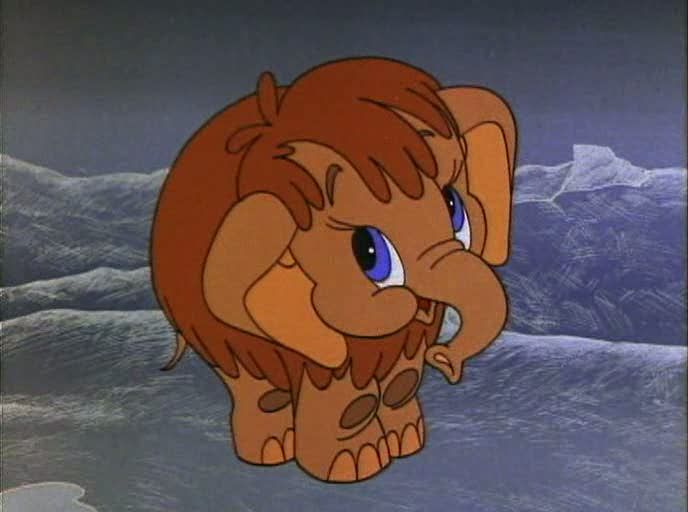

Открываем наш датасетик:

In [2]:
import pandas as pd
df_3 = pd.read_csv('ikanam_publications.csv')
df_3

,post_date,post_id,post_source,post_text,comment_text
0,2016-10-08 21:52:07,1,https://vk.com/wall-130344439_1,Пост состоит из фото,['К посту комментариев нет']
1,2016-10-09 21:53:07,2,https://vk.com/wall-130344439_2,Пост состоит из фото,"['пикчер - бог', 'id6045249Philip,', 'В голос!..."
2,2016-10-09 22:08:21,5,https://vk.com/wall-130344439_5,Сегодня последний день регистрации на киллера....,['К посту комментариев нет']
3,2016-10-10 01:13:47,7,https://vk.com/wall-130344439_7,"Доброй ночи, эконом! Все мы знаем как сильна м...","['Тут отправили фото', 'Тут отправили фото', '..."
4,2016-10-10 01:25:31,16,https://vk.com/wall-130344439_16,Заливайте НОРМ мемы про ЕКАНАМ или учебу в аль...,['К посту комментариев нет']
...,...,...,...,...,...
1039,2025-04-25 13:00:01,5874,https://vk.com/wall-130344439_5874,Сегодня А вот и время лофта! Сегодня в 2000 на...,['К посту комментариев нет']
1040,2025-04-25 19:18:14,5875,https://vk.com/wall-130344439_5875,ДО ЛОФТА ЧАС А пока вы готовитесь разносить эт...,['К посту комментариев нет']
1041,2025-04-27 15:54:51,5878,https://vk.com/wall-130344439_5878,"Гаааайс, а вот и фотки с лофта подъехали В это...",['К посту комментариев нет']
1042,2025-05-16 11:09:02,5879,https://vk.com/wall-130344439_5879,Всем общий саламчик! Мы ищем в Мегафон DS уров...,['К посту комментариев нет']


## 1) Мы решили посмотреть в какое время чаще всего выкладывают посты:

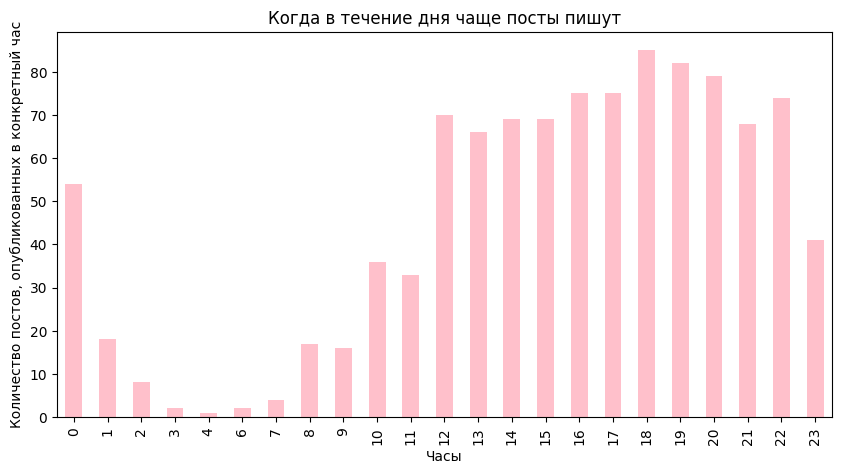

In [19]:
import matplotlib.pyplot as plt
df_3['post_date'] = pd.to_datetime(df_3['post_date'])
df_3['post_hour'] = df_3['post_date'].dt.hour
posts_per_hour = df_3.groupby('post_hour').size()

plt.figure(figsize=(10,5))
posts_per_hour.plot(kind='bar', color='pink')
plt.xlabel('Часы')
plt.ylabel('Количество постов, опубликованных в конкретный час')
plt.title('Когда в течение дня чаще посты пишут')
plt.show()

### На этом розовом графичке видим, что чаще всего посты выкладываются в 18 часов (пропогандируем ставить себе будильники на 18, чтобы не пропустить новые посты), орги est. 2024 профукивают это время и выкладывают позже)))

## 2) Дальше посмотрим в какой день чаще всего пишут люди комменты:

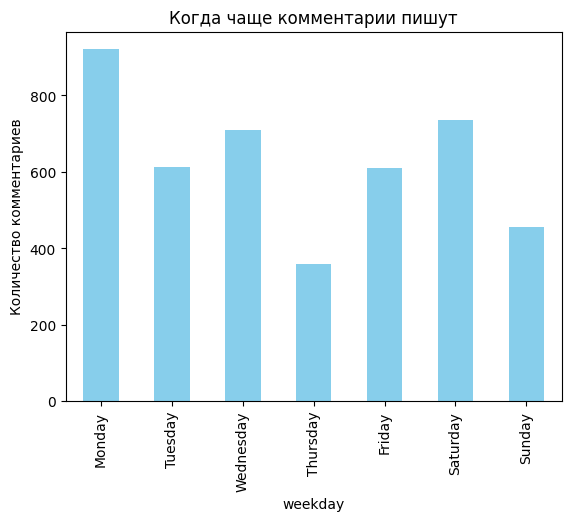

In [20]:
df_3['weekday'] = df_3['post_date'].dt.day_name()
quantity = []

for text in df_3['comment_text']:
    if "К посту комментариев нет" in text:
        quantity.append(0)
    else:
        quantity.append(text.count(',') + 1)
df_3['quantity'] = quantity
comments_by_day = df_3.groupby('weekday')['quantity'].sum()

order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
comments_by_day = comments_by_day.reindex(order)
comments_by_day.plot(kind='bar', color = 'skyblue')
plt.ylabel('Количество комментариев')
plt.title('Когда чаще комментарии пишут')
plt.show()

### О боже понедельник....
### Теперь на голубеньком графичке мы видим, что комменты чаще всего пишутся в понедельник
### P.S орги теперь знают в какой день лучше выкладывать посты, чтобы получить большую активность🥰

## 3) Смотрим в какой день больше всего выкладывают посты:

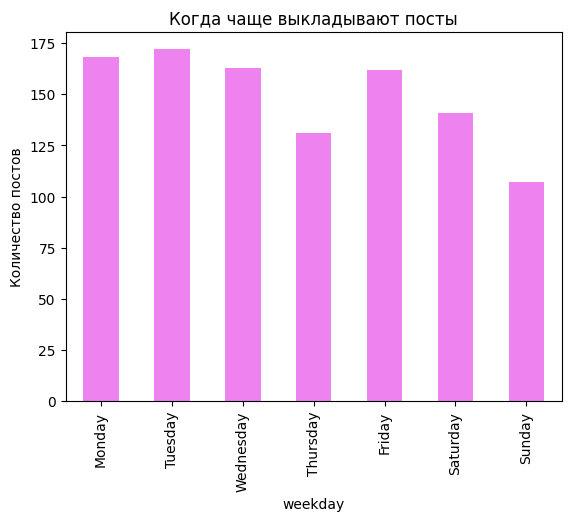

In [21]:
posts_by_day = df_3.groupby('weekday').size()
posts_by_day = posts_by_day.reindex(order)


posts_by_day.plot(kind='bar', color='violet')
plt.ylabel('Количество постов')
plt.title('Когда чаще выкладывают посты')
plt.show()

### По фиолетовому графичку мы видим что посты чаще выкладываются во вторник, а по прошлому анализу их нужно выклыдввть в понедельник))
### Сразу понятно, что орги всё похерили....


## 3) Рассматриваем топ 10 активных дней по числу постов:

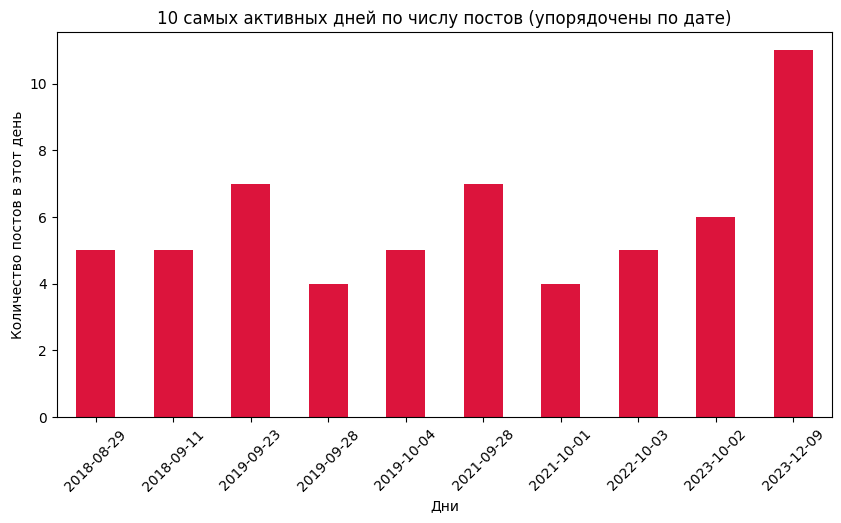

In [22]:
df_3['post_day'] = df_3['post_date'].dt.date
posts_per_day = df_3.groupby('post_day').size()
top_10_days = posts_per_day.sort_values(ascending=False).head(10)
top_10_days = top_10_days.sort_index()

plt.figure(figsize=(10,5))
top_10_days.plot(kind='bar', color='crimson')
plt.xlabel('Дни')
plt.ylabel('Количество постов в этот день')
plt.title('10 самых активных дней по числу постов (упорядочены по дате)')
plt.xticks(rotation=45)
plt.show()

### По этому малиновому графичку мы можем сказать, что 9 декабря 2023 был день с самым большим количеством постов, в это день была карьерка

### А 2023-10-02 конкурс мемов на наш ТУАЛЕТНЫЙ посвят:) 

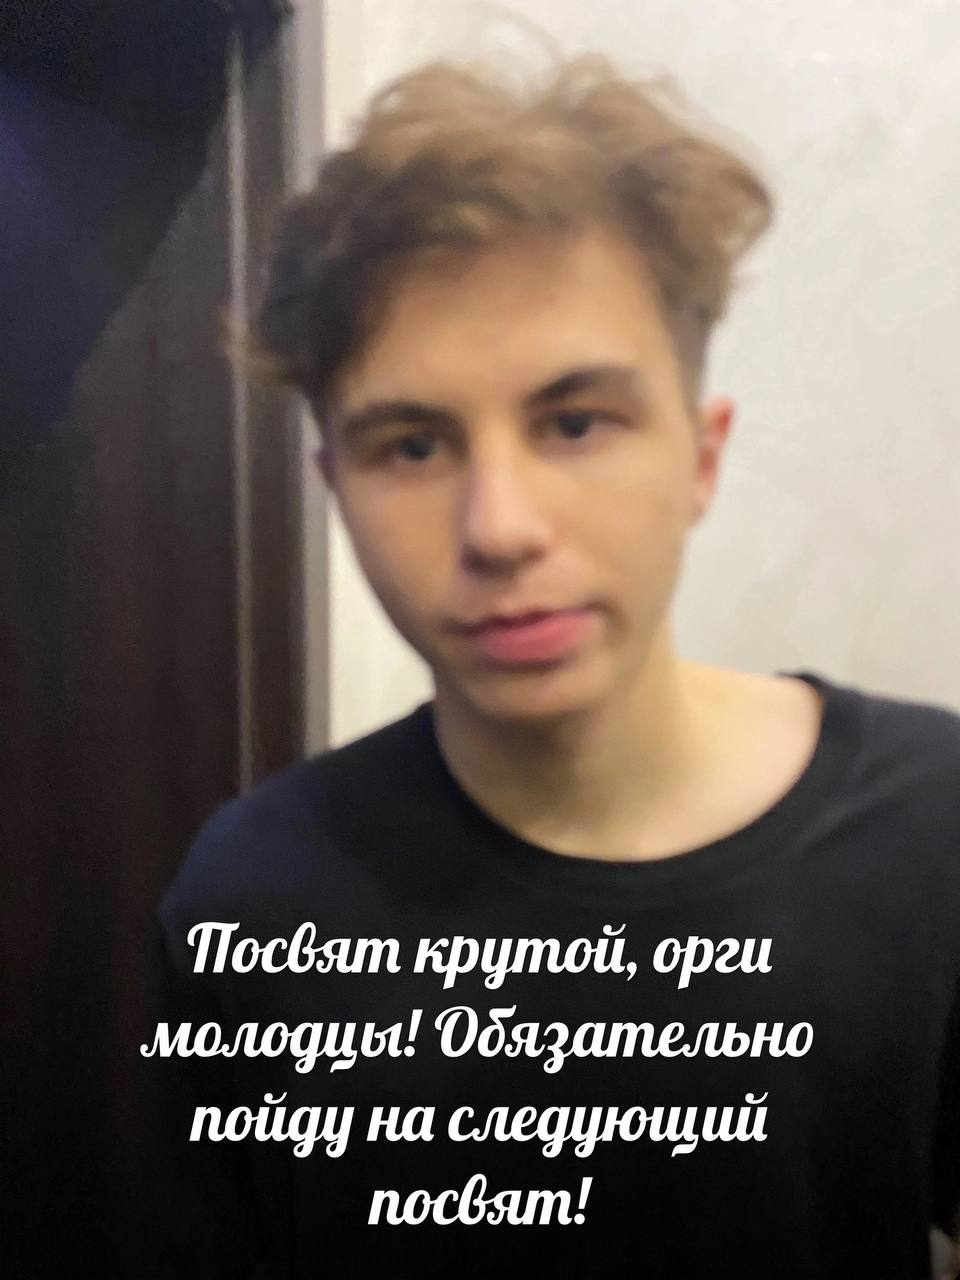
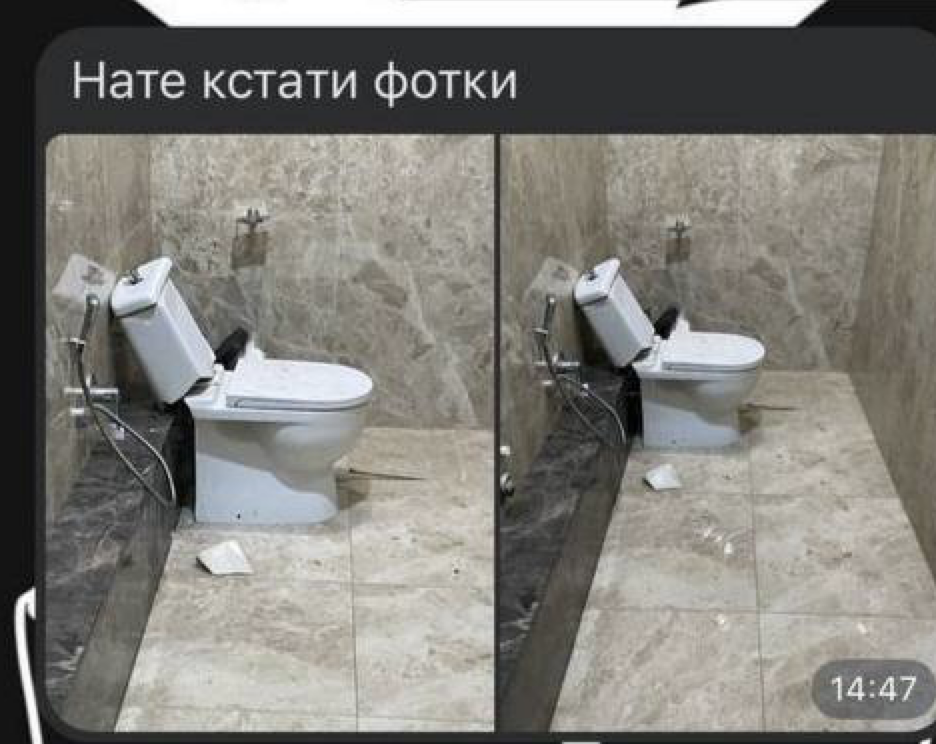